In [3]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [4]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [6]:
html = browser.html
html_soup = soup(html, 'html.parser')

In [7]:
data =[]
rows = html_soup.find_all('tr', class_='data-row')
for row in rows:
    values = row.find_all('td')
    data_row = [value.text for value in values]
    data.append(data_row)
print(data)





[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [8]:
df = pd.DataFrame(data, columns=["id", "terrestrial_date" ,"sol" ,"ls","month","min_temp","pressure"])
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,2,2012-08-16,10,96,4,-77.0,850.0
freq,1,1,1,8,194,138,25


In [10]:
df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
df = df.astype({"id": int, "sol":int ,"ls" : int ,"month": int, "min_temp" : float ,
                "pressure" : float})
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])


In [12]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [13]:

# How many months exist on Mars?

df['month'].nunique()



12

In [20]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?


df['sol'].nunique()




1867

In [18]:

# Which month, on average, has the lowest temperature? The highest?

average_low_month = df.groupby('month').agg({'min_temp': ['mean']})

print(average_low_month)


        min_temp
            mean
month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807


Text(0, 0.5, 'Temperture')

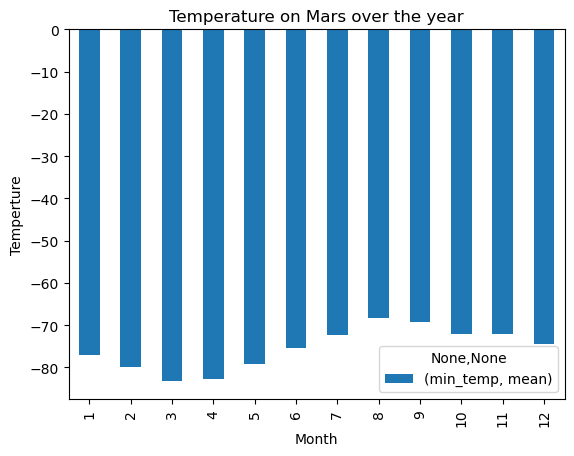

In [19]:
average_low_month.plot.bar(title = "Temperature on Mars over the year")
plt.xlabel("Month")
plt.ylabel("Temperture")

In [16]:
# Which month, on average, has the lowest atmospheric pressure? The highest?

average_low_ap = df.groupby('month').agg({'pressure': ['mean']})
print(average_low_ap)


         pressure
             mean
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627


Text(0, 0.5, 'pressure')

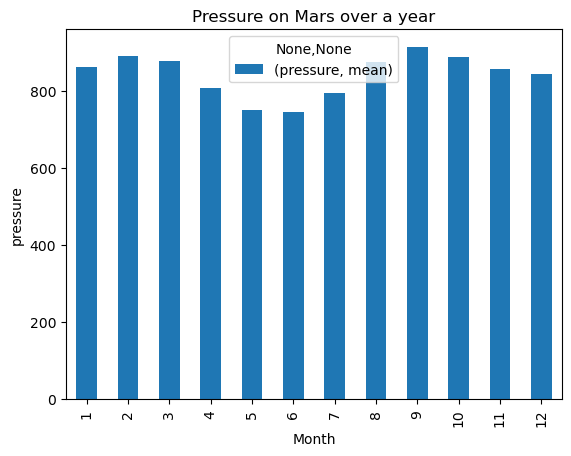

In [17]:
average_low_ap.plot.bar(title = "Pressure on Mars over a year")
plt.xlabel("Month")
plt.ylabel("pressure")

In [38]:
end_point = df.loc[df['ls']==0]
end_point


,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [39]:

import datetime as dt
from datetime import timedelta
from datetime import datetime


b = end_point['terrestrial_date'].iloc[0]
martian_year_end = end_point['terrestrial_date'].iloc[2]
martian_year = martian_year_end -b
martian_year


Timedelta('687 days 00:00:00')

In [ ]:
df.to_csv('table_mars.csv',index=False)